In [13]:
#importing required libraries
import cv2
import mediapipe as mp
import numpy as np
from PIL import Image
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
from matplotlib import image as img
from matplotlib import pyplot as plt
from playsound import playsound

In [14]:
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)

PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


Angles Needed to Compare:

1)Left Elbow (le)

2)Right Elbow (re)

3)Left Arm Lift (lal)

4)Right Arm Lift (ral)

5)Left Bend (lb) (Not pounds ;) 

6)Right Bend (rb) 

7)Left Knee (lk)

8)Right Knee (rk)

In [3]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return round(angle,2)

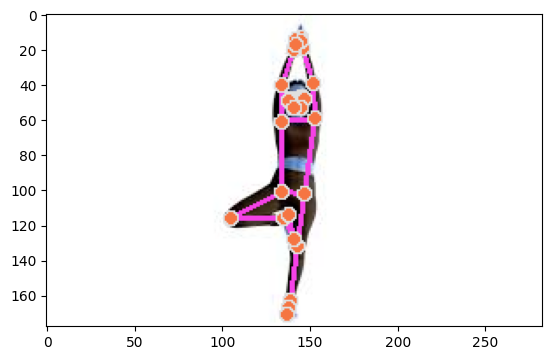

In [4]:
#Pose check on tree pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)
img_ = cv2.imread("tree.jpg")
image = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
image.flags.writeable = False

results = pose.process(image)

image.flags.writeable = True
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                          mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                          mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                          )

plt.imshow(image)
plt.show()

try:
    landmarks = results.pose_landmarks.landmark
    #print(landmarks)
except:
    pass

In [15]:
#Getting angles and storing it in the dictionary
l_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
l_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
l_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
l_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
l_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
l_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

r_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
r_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
r_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
r_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
r_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
r_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]

#Angles
angles={}
#Left Elbow (le)
angles['le'] = calculate_angle(l_shoulder, l_elbow, l_wrist)

#Right Elbow (re)
angles['re'] = calculate_angle(r_shoulder, r_elbow, r_wrist)

#Left Arm Lift (lal)
angles['lal'] = calculate_angle(l_elbow, l_shoulder, l_hip)

#Right Arm Lift (ral)
angles['ral'] = calculate_angle(r_elbow, r_shoulder, r_hip)

#Left Bend (lb) (Not pounds ;) 
angles['lb'] = calculate_angle(l_shoulder, l_hip, l_knee)

#Right Bend (rb) 
angles['rb'] = calculate_angle(r_shoulder, r_hip, r_knee)

#Left Knee (lk)
angles['lk'] = calculate_angle(l_hip, l_knee, l_ankle)

#Right Knee (rk)
angles['rk'] = calculate_angle(r_hip, r_knee, r_ankle)

In [6]:
angles

{'le': 169.8,
 're': 168.97,
 'lal': 174.19,
 'ral': 179.88,
 'lb': 179.86,
 'rb': 130.25,
 'lk': 179.75,
 'rk': 40.47}

In [15]:
#List of angles
target_angles=[]
for a in angles.values():
    target_angles.append(a)
target_angles

[169.8, 168.97, 174.19, 179.88, 179.86, 130.25, 179.75, 40.47]

In [29]:
#The Output
cap = cv2.VideoCapture("tree_custom.mp4")
score = 0
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        score = 0
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        results = pose.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark
            
            l_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            l_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            l_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            l_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            l_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            l_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

            r_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            r_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            r_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            r_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            r_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            r_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]

            vid_le = calculate_angle(l_shoulder, l_elbow, l_wrist)
            vid_re = calculate_angle(r_shoulder, r_elbow, r_wrist)
            vid_lal = calculate_angle(l_elbow, l_shoulder, l_hip)
            vid_ral = calculate_angle(r_elbow, r_shoulder, r_hip)
            vid_lb = calculate_angle(l_shoulder, l_hip, l_knee)
            vid_rb = calculate_angle(r_shoulder, r_hip, r_knee)
            vid_lk = calculate_angle(l_hip, l_knee, l_ankle)
            vid_rk = calculate_angle(r_hip, r_knee, r_ankle)

            if(vid_re > angles['re']+10) :
                cv2.putText(image, "RIGHT ELBOW : BEND", (140,140), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (5, 5, 255), 2, cv2.LINE_AA)
            elif(vid_re < angles['re']-10) :
                cv2.putText(image, "RIGHT ELBOW : BENT TOO MUCH", (140,140), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (5, 5, 255), 2, cv2.LINE_AA)
            else :
                cv2.putText(image, "RIGHT : CORRECT!!!", (140,140), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                score += 1
            
            if(vid_le > angles['le']+10) :
                cv2.putText(image, "LEFT ELBOW : BEND", (140,160), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (5, 5, 255), 2, cv2.LINE_AA)
            elif(vid_le < angles['le']-10) :
                cv2.putText(image, "LEFT ELBOW : BENT TOO MUCH", (140,160), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (5, 5, 255), 2, cv2.LINE_AA)
            else :
                cv2.putText(image, "LEFT ARM : CORRECT!!!", (140,160), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                score += 1
            
            if(vid_lal > angles['lal']+10) :
                cv2.putText(image, "LEFT ARM : LIFT", (140,180), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (5, 5, 255), 2, cv2.LINE_AA)
            elif(vid_lal < angles['lal']-10) :
                cv2.putText(image, "LEFT ARM : LIFTED TOO MUCH", (140,180), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (5, 5, 255), 2, cv2.LINE_AA)
            else :
                cv2.putText(image, "LEFT SIDE : CORRECT!!!", (140,180), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                score += 1
            
            if(vid_ral > angles['ral']+10) :
                cv2.putText(image, "RIGHT ARM : LIFT", (140,200), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (5, 5, 255), 2, cv2.LINE_AA)
            elif(vid_ral < angles['ral']-10) :
                cv2.putText(image, "RIGHT ARM : LIFTED TOO MUCH", (140,200), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (5, 5, 255), 2, cv2.LINE_AA)
            else :
                cv2.putText(image, "RIGHT SIDE : CORRECT!!!", (140,200), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                score += 1
            
            if(vid_lb > angles['lb']+20) :
                cv2.putText(image, "LEFT SIDE : BEND", (140,220), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (5, 5, 255), 2, cv2.LINE_AA)
            elif(vid_lb < angles['lb']-20) :
                cv2.putText(image, "LEFT SIDE : BENT TOO MUCH", (140,220), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (5, 5, 255), 2, cv2.LINE_AA)
            else :
                cv2.putText(image, "LEFT SIDE : CORRECT!!!", (140,220), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                score += 1
            
            if(vid_rb > angles['rb']+20) :
                cv2.putText(image, "RIGHT SIDE : BEND", (140,240), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (5, 5, 255), 2, cv2.LINE_AA)
            elif(vid_rb < angles['rb']-20) :
                cv2.putText(image, "RIGHT SIDE : BENT TOO MUCH", (140,240), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (5, 5, 255), 2, cv2.LINE_AA)
            else :
                cv2.putText(image, "RIGHT SIDE : CORRECT!!!", (140,240), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                score += 1

            if(vid_lk > angles['lk']+20) :
                cv2.putText(image, "LEFT KNEE : BEND", (140,260), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (5, 5, 255), 2, cv2.LINE_AA)
            elif(vid_lk < angles['lk']-20) :
                cv2.putText(image, "LEFT KNEE : BENT TOO MUCH", (140,260), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (5, 5, 255), 2, cv2.LINE_AA)
            else :
                cv2.putText(image, "LEFT KNEE : CORRECT!!!", (140,260), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                score += 1
            
            if(vid_rk > angles['rk']+15) :
                cv2.putText(image, "RIGHT KNEE : BEND", (140,280), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (5, 5, 255), 2, cv2.LINE_AA)
            elif(vid_rk < angles['rk']-15) :
                cv2.putText(image, "RIGHT KNEE : BENT TOO MUCH", (140,280), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (5, 5, 255), 2, cv2.LINE_AA)
            else :
                cv2.putText(image, "RIGHT KNEE : CORRECT!!!", (140,280), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                score += 1
            if(score>=6):
                font_size=1.5
                bgr=(0,150,0)
            else:
                font_size=0.9
                bgr=(255,5,5)
            score=score*12.5
            cv2.putText(image, "SCORE:  " + str(score)+"/100", (140,500), cv2.FONT_HERSHEY_SIMPLEX, font_size, bgr, 2, cv2.LINE_AA)   

        
        except:
            pass

        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('x'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [36]:
#Live input
cap = cv2.VideoCapture(0)
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        score=0
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        results = pose.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark
            
            l_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            l_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            l_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            l_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            l_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            l_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

            r_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            r_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            r_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            r_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            r_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            r_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]

            vid_le = calculate_angle(l_shoulder, l_elbow, l_wrist)
            vid_re = calculate_angle(r_shoulder, r_elbow, r_wrist)
            vid_lal = calculate_angle(l_elbow, l_shoulder, l_hip)
            vid_ral = calculate_angle(r_elbow, r_shoulder, r_hip)
            vid_lb = calculate_angle(l_shoulder, l_hip, l_knee)
            vid_rb = calculate_angle(r_shoulder, r_hip, r_knee)
            vid_lk = calculate_angle(l_hip, l_knee, l_ankle)
            vid_rk = calculate_angle(r_hip, r_knee, r_ankle)

            if(vid_re > angles['re']+10) :
                cv2.putText(image, "RIGHT ELBOW : BEND MORE", (40,40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (5, 5, 255), 2, cv2.LINE_AA)
            elif(vid_re < angles['re']-10) :
                cv2.putText(image, "RIGHT ELBOW : BENT TOO MUCH", (40,40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (5, 5, 255), 2, cv2.LINE_AA)
            else :
                cv2.putText(image, "RIGHT : CORRECT!!!", (40,40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                score += 1
            
            if(vid_le > angles['le']+10) :
                cv2.putText(image, "LEFT ELBOW : BEND MORE", (40,60), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (5, 5, 255), 2, cv2.LINE_AA)
            elif(vid_le < angles['le']-10) :
                cv2.putText(image, "LEFT ELBOW : BENT TOO MUCH", (40,60), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (5, 5, 255), 2, cv2.LINE_AA)
            else :
                cv2.putText(image, "LEFT ARM : CORRECT!!!", (40,60), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                score += 1
            
            if(vid_lal > angles['lal']+10) :
                cv2.putText(image, "LEFT ARM : LIFT HIGHER", (40,80), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (5, 5, 255), 2, cv2.LINE_AA)
            elif(vid_lal < angles['lal']-10) :
                cv2.putText(image, "LEFT ARM : LIFTED TOO MUCH", (40,80), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (5, 5, 255), 2, cv2.LINE_AA)
            else :
                cv2.putText(image, "LEFT SIDE : CORRECT!!!", (40,80), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                score += 1
            
            if(vid_ral > angles['ral']+10) :
                cv2.putText(image, "RIGHT ARM : LIFT HIGHER", (40,100), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (5, 5, 255), 2, cv2.LINE_AA)
            elif(vid_ral < angles['ral']-10) :
                cv2.putText(image, "RIGHT ARM : LIFTED TOO MUCH", (40,100), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (5, 5, 255), 2, cv2.LINE_AA)
            else :
                cv2.putText(image, "RIGHT SIDE : CORRECT!!!", (40,100), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                score += 1
            
            if(vid_lb > angles['lb']+20) :
                cv2.putText(image, "LEFT SIDE : BEND MORE", (40,120), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (5, 5, 255), 2, cv2.LINE_AA)
            elif(vid_lb < angles['lb']-20) :
                cv2.putText(image, "LEFT SIDE : BENT TOO MUCH", (40,120), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (5, 5, 255), 2, cv2.LINE_AA)
            else :
                cv2.putText(image, "LEFT SIDE : CORRECT!!!", (40,120), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                score += 1
            
            if(vid_rb > angles['rb']+20) :
                cv2.putText(image, "RIGHT SIDE : BEND MORE", (40,140), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (5, 5, 255), 2, cv2.LINE_AA)
            elif(vid_rb < angles['rb']-20) :
                cv2.putText(image, "RIGHT SIDE : BENT TOO MUCH", (40,140), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (5, 5, 255), 2, cv2.LINE_AA)
            else :
                cv2.putText(image, "RIGHT SIDE : CORRECT!!!", (40,140), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                score += 1

            if(vid_lk > angles['lk']+20) :
                cv2.putText(image, "LEFT KNEE : BEND MORE", (40,160), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (5, 5, 255), 2, cv2.LINE_AA)
            elif(vid_lk < angles['lk']-20) :
                cv2.putText(image, "LEFT KNEE : BENT TOO MUCH", (40,160), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (5, 5, 255), 2, cv2.LINE_AA)
            else :
                cv2.putText(image, "LEFT KNEE : CORRECT!!!", (40,160), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                score += 1
            
            if(vid_rk > angles['rk']+15) :
                cv2.putText(image, "RIGHT KNEE : BEND MORE", (40,180), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (5, 5, 255), 2, cv2.LINE_AA)
            elif(vid_rk < angles['rk']-15) :
                cv2.putText(image, "RGIHT KNEE : BENT TOO MUCH", (40,180), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (5, 5, 255), 2, cv2.LINE_AA)
            else :
                cv2.putText(image, "RIGHT KNEE : CORRECT!!!", (40,180), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                score += 1  
            if(score>=6):
                font_size=0.7
                bgr=(0,150,0)
            else:
                font_size=0.5
                bgr=(255,5,5)
            score=score*12.5
            cv2.putText(image, "SCORE:  " + str(score)+"/100", (40,300), cv2.FONT_HERSHEY_SIMPLEX, font_size, bgr, 2, cv2.LINE_AA)       
        
        except:
            pass

        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('x'):
            break

    cap.release()
    cv2.destroyAllWindows()